# Reproduce the formulation and resolution of Model Predictive Control as a QP problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
class MPCParams():
    def __init__(self, T, N, h_CoM, g):
        self.T = T
        self.N = N
        self.h_CoM = h_CoM
        self.g = g
        self.Px = np.array([[1., (i+1)*T, (i+1)**2*T**2/2 - h_CoM/g] for i in range(N)])
        self.Pu = np.zeros((N,N))
        for i in range(N):
            for j in range(i+1):
                self.Pu[i, i-j] = (1 + 3*j + 3*(j**2)) * (T**3/6) - T*h_CoM/g

        self.A = np.array([[1., T, (T**2)/2], [0., 1., T], [0., 0., 1.]]) 
        self.b = np.array([(T**3)/6., T**2/2., T])

        self.e = np.array([1., 0., h_CoM/g])

    def compute_next_x(self, jerk, prev):
        return self.A @ prev + jerk * self.b
    

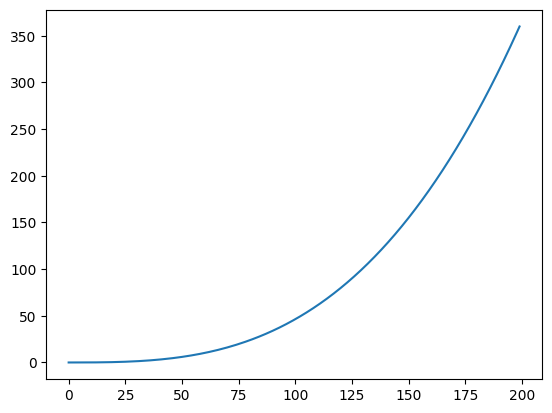

In [24]:
T = 0.3
N = 10
jerk = 0.01
g = 9.87
h_CoM = 1

mpc = MPCParams(T, N, h_CoM, g)
x_path = []
x = np.zeros(3, dtype=float)

for k in range(200):
    x = mpc.compute_next_x(jerk, x)
    z = mpc.compute_next_z(x)
    x_path.append(x[0])
plt.plot(x_path)
plt.show()

In [ ]:
# G = np.linalg.inv(mpc.Pu) * (Z)